# Introdução:

No projeto a seguir iremos analisar uma base de dados sobre jogos digitais, para que possamos entender o comportamento e preferencias dos jogadores de diferentes regiões.
Também iremos ver quais plataformas vendem mais, quais as faixas de recomendação etária e também o quanto as avaliações influenciam nas vendas dos jogos.


## Preparando os Dados

In [1]:
#importando as bibliotecas 

import pandas as pd 
import numpy as np

In [2]:
#carregando os dataset com os dados que usaremos na análise

df = pd.read_csv('/datasets/games.csv')

In [3]:
#imprimindo as 10 primeiras linhas 
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#passando o nome de todas as colunas para letra minúscula
df.columns = df.columns.str.lower()

In [5]:
#verificando informações básicas do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#visualizando estatísticas básicas do dataframe
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
# LIDANDO COM VALORES AUSENTES #

#como temos poucos valores ausentes na coluna 'name', optei por exclui-los
df.dropna(subset=['name'], inplace=True)

In [8]:
#convertendo a coluna 'year_of_release' para numeros inteiros
df['year_of_release'] = df['year_of_release'].astype(pd.Int64Dtype())

#substituindo os valores ausentes pela moda da coluna
mode_year = df['year_of_release'].mode()[0]
df['year_of_release'].fillna(mode_year, inplace=True)

#preenchendo os valores ausentes na coluna 'genre' com a moda da coluna
df['genre'].fillna(df['genre'].mode()[0], inplace=True)

#preenchendo os valores ausentes na coluna 'critic_score' com a mediana da coluna 
df['critic_score'].fillna(df['critic_score'].median(), inplace=True)

Escolhi excluir os dados com valores ausentes na coluna com o nome, pois eram poucos valores e acredito que não terá grande impacto na nossa análise. 

Na coluna com o ano de lançamento do jogo, optei por substituir os valores pela média da coluna.

já apara as colunas com as notas de avaliação dos criticos, optei por preencher os valores ausentes com a mediana, pois acredito que assim terá menos impacto na nossa análise, do que se fizesse com a média.

Para preencher os valores ausentes na coluna de avaliação dos usuários será preciso primeiro alterar o tipo dos dados.
Também irei preencher com a mediana da coluna. 

In [9]:
#substituindo os valores nao numéricos 'tbd' na coluna 'user_id' por 0 para depois alterar o tipo dos dados e só então substituir os valores pela mediana.
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].fillna(0, inplace=True)


#mudando o tipo dos dados da coluna 'user_score' para float
df['user_score'] = df['user_score'].astype(float)

#preenchendo os valores ausentes na coluna 'critic_score' com a mediana da coluna 
df['user_score'].fillna(df['user_score'].median(), inplace=True)

In [10]:
#verificando a distribuição na coluna 'rating'
df['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Decidi preencher os valores ausentes na coluna 'rating' com a moda da coluna 
pois quase 70% dos valores estão distribuidos entre E (everyone) e T (teen) que também não trás grandes restrições. 
sendo assim, vou preencher os valores ausentes com E (everyone).

In [11]:
#preenchendo os valores ausentes na coluna 'rating' com a moda da coluna
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [13]:
#criando uma nova coluna com o total das vendas de cada jogo
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,0.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,71.0,0.0,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71.0,0.0,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,0.0,E,0.01


## Analisando os dados

In [14]:
#Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

df['year_of_release'].value_counts()

2008    1696
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

Acima podemos ver o numéro de jogos lançados em cada ano.
Podemos observar que os anos que com maior número de lançamentos foram de 2006 até 2011.
Para nossa análise, que é para tomadas de decisão em 2017, iremos considerar os 3 anos anteriores, ou seja 2013 até 2016.

In [15]:
#agrupando por plataforma e calculando as vendas totais
sales_by_platform = df.groupby('platform')['total_sales'].sum().reset_index()

#ordenando as vendas de forma decrescente
sales_by_platform = sales_by_platform.sort_values('total_sales', ascending=False)

sales_by_platform

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [16]:
#identificando as plataformas com maior numero de vendas 
top_platforms = sales_by_platform.head(5)['platform'].tolist()

In [17]:
#Filtrando o DataFrame para incluir apenas as plataformas selecionadas
df_top_platforms = df[df['platform'].isin(top_platforms)]

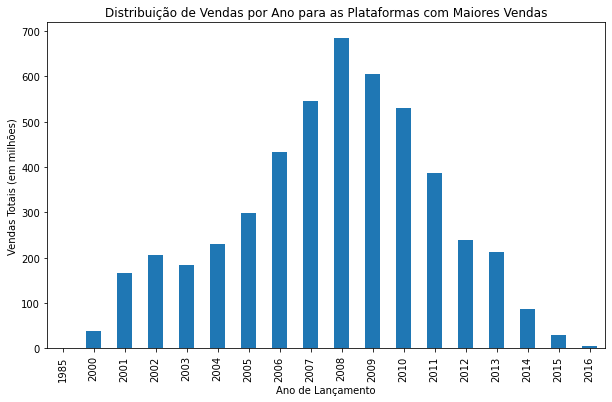

In [18]:
#construindo a distribuição de cada ano com a soma das vendas das top platforms

#importando a biblioteca matplotlib
import matplotlib.pyplot as plt

#Agrupando o DataFrame filtrado por ano de lançamento e calculando as vendas totais
sales_by_year = df_top_platforms.groupby('year_of_release')['total_sales'].sum()

#Plotando a distribuição
plt.figure(figsize=(10, 6))
sales_by_year.plot(kind='bar')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Distribuição de Vendas por Ano para as Plataformas com Maiores Vendas')
plt.show()

Agora vamos identificar quais plataformas costumavam ser populares, e atualmente não vendem mais. 

Para encontrar as plataformas que costumavam ser populares, mas agora não têm vendas, iremos pode realizar a seguinte análise:

In [19]:
#identificando as plataformas que tiveram vendas em algum momento no passado
popular_platforms = df[df['total_sales'] > 0]['platform'].unique()

#filtrando as plataformas que não tiveram vendas nos últimos anos
platforms_without_sales = df[(df['platform'].isin(popular_platforms)) & (df['year_of_release'] >= 2016)]['platform'].unique()

#exibindo a lista das plataformas que costumavam ser populares, mas agora não têm vendas
print("Plataformas que costumavam ser populares, mas agora não têm vendas:")
for platform in platforms_without_sales:
    print("- " + platform)

Plataformas que costumavam ser populares, mas agora não têm vendas:
- PS4
- 3DS
- XOne
- WiiU
- PS3
- PC
- X360
- PSV
- Wii


Abaixo iremos análisar as vendas das top plataformas por ano, levando em consideração os anos entre 2013 até 2016.

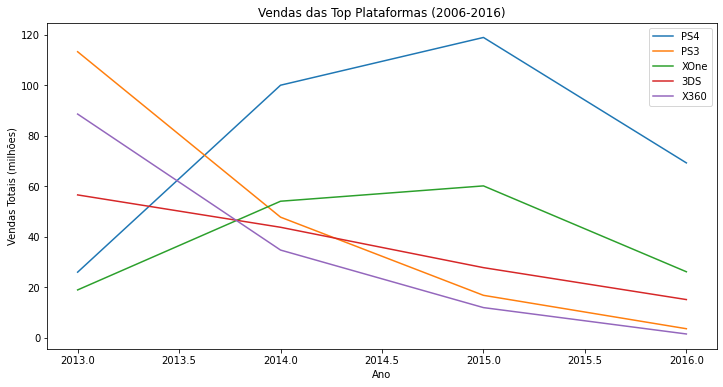

In [20]:
# Filtrar o DataFrame para incluir apenas os anos entre 2013 e 2016
filtered_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]

# Agrupar os dados por plataforma e calcular as vendas totais de cada plataforma
platform_sales = filtered_df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

# Selecionar as principais plataformas com base nas vendas totais
top_platforms = platform_sales.groupby('platform')['total_sales'].sum().nlargest(5).index

# Filtrar o DataFrame para incluir apenas as principais plataformas
filtered_df = filtered_df[filtered_df['platform'].isin(top_platforms)]

# Criar o gráfico de linhas
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform)

plt.title('Vendas das Top Plataformas (2006-2016)')
plt.xlabel('Ano')
plt.ylabel('Vendas Totais (milhões)')
plt.legend()
plt.show()

Podemos observar que a partir do ano 2013, somente duas plataformas tiveram crescimento nas vendas: PS4 e XboxOne. 
Delas duas, o PS4 foi a que teve maior volume de vendas, mas ambas tiveram seu auge de crescimento entre 2013 e 2014, depois continuaram crescendo mas com menor volume, para então começarem a decair em 2015. 
atualmente ambas estão em queda, mas o PS4 continua tendo maior volume de vendas em comparação ao XboxOne.


In [21]:
#criando um novo df filtrado com apenas os jogos lançados a partir de 2013 até atualmente
df_current = df[df['year_of_release'] >= 2013]

df_current

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,0.0,E,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,71.0,0.0,E,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01


In [22]:
#quais plataformas estão liderando as vendas? (nos ultimos 3 anos)

# Agrupar os dados por plataforma e calcular as vendas totais de cada plataforma
current_platform_sales = df_current.groupby('platform')['total_sales'].sum()

# Ordenar as plataformas com base nas vendas totais em ordem decrescente
current_platform_sales_sorted = current_platform_sales.sort_values(ascending=False)

# Exibir as plataformas que estão liderando as vendas
current_top_platforms = current_platform_sales_sorted.head(5)  # Selecionar as top 5 plataformas
current_top_platforms

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
Name: total_sales, dtype: float64

Abaixo iremos criar um gráfico de caixa para mostrar o desempenho nas vendas de cada plataforma nos ultimos 3 anos

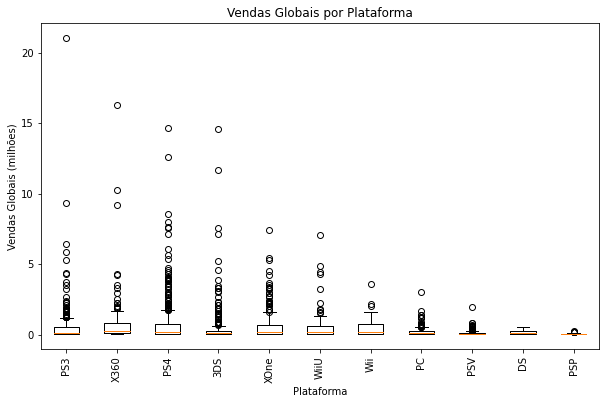

In [23]:
#Criando uma lista com as plataformas únicas no DataFrame
plataformas = df_current['platform'].unique()

#criando uma lista vazia para armazenar as vendas globais por plataforma
vendas_globais = []

#fazendo a iteração sobre as plataformas para ter as vendas globais de cada uma
for plataforma in plataformas:
    vendas = df_current[df_current['platform'] == plataforma]['total_sales']
    vendas_globais.append(vendas)

#criando o gráfico de caixa
plt.figure(figsize=(10, 6))
plt.boxplot(vendas_globais, labels=plataformas)
plt.title('Vendas Globais por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (milhões)')
plt.xticks(rotation=90)
plt.show()

O gráfico de caixa mostra a variação nas vendas globais de jogos por plataforma. 

Podemos observar diferenças no desempenho médio de vendas entre as plataformas, bem como variações na distribuição das vendas. 

Também é possível identificar valores atípicos, que representam jogos com vendas globais excepcionalmente altas ou baixas. 

O gráfico ajuda a entender as tendências de vendas entre as plataformas, mas é necessário considerar outros fatores antes de tirar conclusões definitivas.

Quanto às vendas médias em várias plataformas, podemos observar a posição das medianas nas caixas. 

Plataformas com medianas mais altas indicam vendas médias mais elevadas, enquanto aquelas com medianas mais baixas têm vendas médias mais baixas. 

Essas diferenças nas medianas podem indicar um desempenho geralmente superior ou inferior de vendas entre as plataformas.

In [24]:
#agora vamos criar um gráfico de dispersão e testar se as avaliações dos usuários e dos criticos influenciam no número de vendas.

#para esse gráfico iremos usar a plataforma PS3 que é uma das mais populares

In [25]:
#Vamos começar criando um novo DataFrame que contém apenas os dados da plataforma PS3

ps3_data = df_current[df_current['platform'] == 'PS3']
ps3_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
126,FIFA 14,PS3,2013,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
149,The Last of Us,PS3,2013,Action,2.41,2.18,0.28,0.99,95.0,9.1,M,5.86
180,Minecraft,PS3,2014,Misc,2.03,2.37,0.00,0.87,71.0,0.0,E,5.27
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016,Action,0.00,0.01,0.00,0.00,71.0,0.0,E,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,71.0,0.0,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,71.0,0.0,E,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01


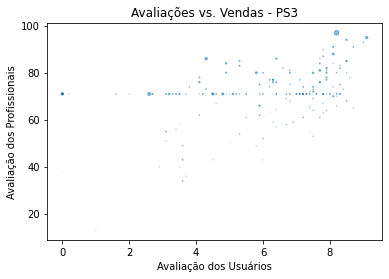

In [26]:
#plotando o gráfico de dispersão usando as colunas 'user_score' e 'critic_score' como os eixos X e Y, respectivamente, e 'total_sales' como o tamanho dos pontos

plt.scatter(ps3_data['user_score'], ps3_data['critic_score'], s=ps3_data['total_sales'], alpha=0.5)
plt.xlabel('Avaliação dos Usuários')
plt.ylabel('Avaliação dos Profissionais')
plt.title('Avaliações vs. Vendas - PS3')
plt.show()

In [27]:
#agora vamos calcular a correlação entre as avaliações de usuários, as avaliações de profissionais e as vendas usando o método corr() do DataFrame

correlation = ps3_data[['user_score', 'critic_score', 'total_sales']].corr()
correlation

,user_score,critic_score,total_sales
user_score,1.000000,0.159671,0.202091
critic_score,0.159671,1.000000,0.294214
total_sales,0.202091,0.294214,1.000000


O gráfico de dispersão mostra uma correlação positiva entre as avaliações e o número de vendas.
O que significa que quanto melhor a avaliação, mais vendas teremos de determinado jogo naquela plataforma. 

Agora que já temos um df somente com os jogos da plataforma PS3, vamos analisar as vendas desses jogos em outras plataformas e então compara-las


In [28]:
#Identificando os jogos que também foram lançados em outras plataformas

multiplatform_games = df_current[df_current['name'].isin(ps3_data['name'])]
multiplatform_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,71.0,0.0,E,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,71.0,6.6,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,71.0,0.0,E,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,0.0,E,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


In [29]:
#Agrupando os dados por nome do jogo e calculando as vendas totais em cada plataforma

platform_sales = multiplatform_games.groupby(['name', 'platform'])['total_sales'].sum().reset_index()
platform_sales

,name,platform,total_sales
0,2014 FIFA World Cup Brazil,PS3,0.61
1,2014 FIFA World Cup Brazil,X360,0.43
2,3rd Super Robot Wars Z Jigoku Hen,PS3,0.23
3,3rd Super Robot Wars Z Jigoku Hen,PSV,0.19
4,3rd Super Robot Wars Z: Tengoku-Hen,PS3,0.15
...,...,...,...
1039,Young Justice: Legacy,3DS,0.03
1040,Young Justice: Legacy,PS3,0.09
1041,Young Justice: Legacy,Wii,0.03
1042,Young Justice: Legacy,X360,0.01


Podemos observar logo de cara que há uma grande diferença no volume de vendas entre uma plataforma e outra, como no exemplo acima do jogo
PRO EVOLUTION SOCCER 2011.

Agora vamos comparar as vendas dos mesmos jogos nas plataforma PS3 e na plataforma Xbox 360 para vermos se existem grandes diferenças no volume de vendas.

In [30]:
ps3_sales = platform_sales[platform_sales['platform'] == 'PS3']['total_sales']
xbox360_sales = platform_sales[platform_sales['platform'] == 'X360']['total_sales']

# Compare as vendas médias
mean_ps3_sales = ps3_sales.mean()
mean_xbox360_sales = xbox360_sales.mean()

# Compare as vendas totais
total_ps3_sales = ps3_sales.sum()
total_xbox360_sales = xbox360_sales.sum()

In [31]:
#exibindo as vendas médias no PS3
mean_ps3_sales

0.5258840579710146

In [32]:
#exibindo as vendas médias no XBOX360
mean_xbox360_sales

0.7909036144578314

In [33]:
#exibindo o volume total de vendas no PS3 
total_ps3_sales

181.43

In [34]:
#exibindo o volume total de vendas no XBOX360
total_xbox360_sales

131.29000000000002

Podemos concluir que existe sim diferença no volume de vendas entre as plataformas, vimos que na média o volume é maior para o xbox360
porém no montante total o volume de vendas é maior no PS3. 

Agora vamos criar um boxplot mostrando o volume de vendar por genero 

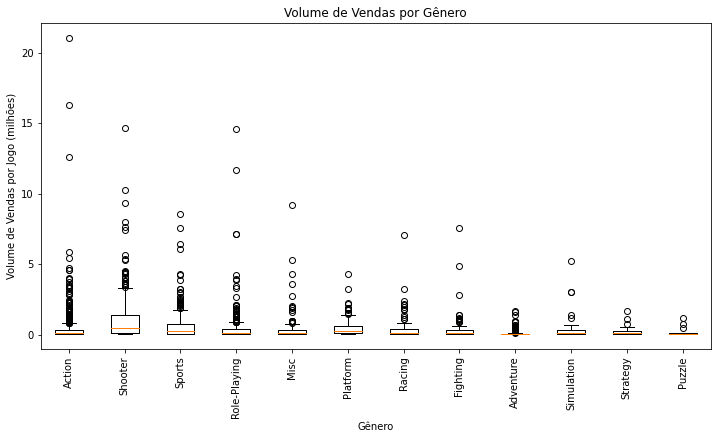

In [35]:
#agrupando os dados por gênero e calcular o volume de vendas por jogo
genre_sales = df_current.groupby('genre')['total_sales'].sum()

#ordenando os gêneros pelo volume de vendas
sorted_genres = genre_sales.sort_values(ascending=False).index

#criando o boxplot
plt.figure(figsize=(12, 6))
plt.boxplot([df_current[df_current['genre'] == genre]['total_sales'] for genre in sorted_genres], labels=sorted_genres)
plt.xlabel('Gênero')
plt.ylabel('Volume de Vendas por Jogo (milhões)')
plt.title('Volume de Vendas por Gênero')
plt.xticks(rotation=90)
plt.show()

- Os gêneros de ação, esportes e tiro têm os maiores volumes de vendas, com valores medianos superiores em comparação com os demais gêneros. Isso sugere que esses gêneros são os mais populares e têm um potencial maior de vendas.


- Os gêneros de puzzle, estratégia e aventura tendem a ter volumes de vendas menores, com valores medianos inferiores em comparação com os outros gêneros. Isso indica que esses gêneros podem ter uma base de fãs menor ou uma demanda de mercado mais restrita.


- Vemos uma maior variabilidade nas vendas de jogos dos gêneros de ação, esportes e tiro, representada pelos "braços" mais longos do boxplot. Isso mostra que esses gêneros têm uma amplitude maior no volume de vendas, com alguns jogos alcançando vendas muito altas, enquanto outros têm vendas mais baixas.


- Os gêneros de RPG e corrida também apresentam uma variabilidade considerável nas vendas, com alguns jogos alcançando vendas expressivas, enquanto outros tem desempenho mais fraco em vendas.

## Criando um perfil de usuário para cada região 

In [36]:
#agrupando por plataforma e calculando as vendas totais para cada região
sales_by_platform = df_current.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

#calculando as cinco principais plataformas em cada região
top_platforms_na = sales_by_platform.na_sales.nlargest(5)
top_platforms_eu = sales_by_platform.eu_sales.nlargest(5)
top_platforms_jp = sales_by_platform.jp_sales.nlargest(5)

#calculando as quotas de mercado para cada região em %
market_share_na = (top_platforms_na / top_platforms_na.sum()) * 100
market_share_eu = (top_platforms_eu / top_platforms_eu.sum()) * 100
market_share_jp = (top_platforms_jp / top_platforms_jp.sum()) * 100

#Exibindo os resultados da América do norte
print("América do Norte - Principais plataformas:")
print(top_platforms_na)
print()
print("Quotas de mercado:")
print(market_share_na)

América do Norte - Principais plataformas:
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

Quotas de mercado:
platform
PS4     28.228026
XOne    24.173200
X360    21.198276
PS3     16.484087
3DS      9.916411
Name: na_sales, dtype: float64


In [37]:
#exibindo os resultados para Europa
print("Europa - Principais plataformas:")
print(top_platforms_eu)
print()
print("Quotas de mercado:")
print(market_share_eu)

Europa - Principais plataformas:
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

Quotas de mercado:
platform
PS4     42.246310
PS3     20.304219
XOne    15.447495
X360    12.731682
3DS      9.270294
Name: eu_sales, dtype: float64


In [38]:
#exibindo os resultados para Japão
print("Japão - Principais plataformas:")
print(top_platforms_jp)
print()
print("Quotas de mercado:")
print(market_share_jp)

Japão - Principais plataformas:
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

Quotas de mercado:
platform
3DS     49.644923
PS3     17.094956
PSV     13.610074
PS4     11.684604
WiiU     7.965444
Name: jp_sales, dtype: float64


Com base na análise das cinco principais plataformas em cada região e suas quotas de mercado, podemos tirar algumas conclusões:

- Variações regionais: As plataformas populares podem variar bastante entre as regiões. O que é popular na América do Norte pode não ter o mesmo sucesso na Europa ou no Japão. Isso pode ser atribuído a preferências culturais, estratégias de marketing e à presença de concorrentes locais.


- Dominância de plataformas específicas: É possível observar que algumas plataformas são líderes em várias regiões. Essas plataformas dominantes podem ter uma presença global forte e uma base de fãs fiéis. Isso pode ser vantajoso para desenvolvedores e editores de jogos, pois eles podem direcionar seus esforços para essas plataformas-chave para maximizar seu alcance e impacto no mercado.


- Sensibilidade cultural: A análise das quotas de mercado revela a importância da sensibilidade cultural. O Japão, por exemplo, pode ter preferências de jogos diferentes da América do Norte e da Europa. Portanto, entender as preferências e tendências específicas de cada região é crucial para alcançar o sucesso no mercado de jogos.


- Oportunidades de mercado: Identificar as plataformas líderes em cada região pode ser útil para empresas e desenvolvedores de jogos, pois isso pode indicar onde há maior demanda e oportunidades de mercado. Eles podem adaptar suas estratégias de lançamento e marketing para atender às preferências do público em cada região e maximizar seu potencial de vendas.

In [39]:
#Agrupando por gênero e calculando a contagem de jogos em cada gênero
genre_counts = df_current['genre'].value_counts()

#Selecionando os cinco principais gêneros
top_genres = genre_counts.head(5)

#Exibindo os resultados
print("Cinco principais gêneros:")
top_genres

Cinco principais gêneros:


Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Name: genre, dtype: int64

In [40]:
#Agrupando os dados por classificação do ESRB e calculando as vendas totais por região
sales_by_rating = df_current.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

#Exibindo os resultados
print("Vendas totais por região e classificação do ESRB:")
sales_by_rating

Vendas totais por região e classificação do ESRB:


,na_sales,eu_sales,jp_sales
rating,,,
E,168.47,162.27,100.19
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
T,49.79,41.95,20.59


podemos observar que a região da América do Norte (na) é onde se concentra o maior número de vendas, em todas as categorias, lá é o lugar com maior volume de vendas.


Agora vamos utilizar a classificação para comparar os resultados na mesma localidade, para ver o volume de vendas de jogos de cada classificação, por região.

In [41]:
#Agrupando os dados por classificação e calculando a soma das vendas em cada região
sales_by_rating_na = df.groupby('rating')['na_sales'].sum()
sales_by_rating_eu = df.groupby('rating')['eu_sales'].sum()
sales_by_rating_jp = df.groupby('rating')['jp_sales'].sum()


In [42]:
#América do norte
print("Vendas totais por classificação na América do Norte:")
sales_by_rating_na

Vendas totais por classificação na América do Norte:


rating
AO         1.26
E       2533.67
E10+     353.32
EC         1.53
K-A        2.56
M        748.48
RP         0.00
T        759.75
Name: na_sales, dtype: float64

In [43]:
#Europa
print("Vendas totais por classificação na Europa:")
sales_by_rating_eu

Vendas totais por classificação na Europa:


rating
AO         0.61
E       1323.55
E10+     188.52
EC         0.11
K-A        0.27
M        483.97
RP         0.08
T        427.03
Name: eu_sales, dtype: float64

In [44]:
#Japão
print("Vendas totais por classificação no Japão:")
sales_by_rating_jp

Vendas totais por classificação no Japão:


rating
AO         0.00
E       1040.04
E10+      40.20
EC         0.00
K-A        1.46
M         64.24
RP         0.00
T        151.40
Name: jp_sales, dtype: float64

A classificação etária também pode afetar diretamente o volume de vendas em cada região. 
Por exemplo, no Japão não ocorreram vendas para jogos de classificação AO (adults only), então as empresas de games não devem investir em jogos desse segmento naquele país, já na América do norte, existe um público para esse tipo de jogo. 

Outro exemplo são os jogos de classificação M (mature) que são destinados para pessoas acima de 17 anos. No Japão não teve um volume de vendas tão grande comparado com as outras regiões, o que indica que a preferencia predominante naquela região é por jogos mais leves, que podem ser jogados pela maioria das idades, sem restrições. 

Sabendo disso as empresas podem direcionar melhor suas campanhas pubicitárias para cada região.

## Testando hipóteses

In [45]:
#As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas?

from scipy import stats

#Filtrando o dataframe para incluir apenas as plataformas Xbox One e PC
xbox_one_scores = df_current[df_current['platform'] == 'Xbox One']['user_score']
pc_scores = df_current[df_current['platform'] == 'PC']['user_score']

#Realizando o teste t independente
t_statistic, p_value = stats.ttest_ind(xbox_one_scores, pc_scores)

#Definindo o nível de significância
alpha = 0.05

#Comparando o valor de p com o nível de significância
if p_value < alpha:
    print("Rejeitar a hipótese nula")
    print("Há evidências de que as classificações médias dos usuários nas plataformas Xbox One e PC são diferentes.")
else:
    print("Aceitar a hipótese nula")
    print("Não há evidências suficientes para concluir que as classificações médias dos usuários nas plataformas Xbox One e PC são diferentes.")

Aceitar a hipótese nula
Não há evidências suficientes para concluir que as classificações médias dos usuários nas plataformas Xbox One e PC são diferentes.


Nesse caso o valor p foi maior que o nivel de significancia, então aceitamos a hipótese nula, que significa que não existem evidencias que as classificações médias das plataformas são diferentes.

In [46]:
#Filtrando o dataframe para incluir apenas os gêneros Action e Sports
action_scores = df_current[df_current['genre'] == 'Action']['user_score']
sports_scores = df_current[df_current['genre'] == 'Sports']['user_score']

#Realizando o teste t independente
t_statistic, p_value = stats.ttest_ind(action_scores, sports_scores)

#Definindo o nível de significância
alpha = 0.05

#Comparando o valor de p com o nível de significância
if p_value < alpha:
    print("Rejeitar a hipótese nula")
    print("Há evidências de que as classificações médias de usuários para os gêneros Action e Sports são diferentes.")
else:
    print("Aceitar a hipótese nula")
    print("Não há evidências suficientes para concluir que as classificações médias de usuários para os gêneros Action e Sports são diferentes.")

Aceitar a hipótese nula
Não há evidências suficientes para concluir que as classificações médias de usuários para os gêneros Action e Sports são diferentes.


Comparando o valor de p com o nível de significância (0.05), podemos decidir se rejeitamos ou aceitamos a hipótese nula. Nesse caso o valor de p foi menor que o nível de significância,então rejeitamos a hipótese nula e concluímos que as classificações médias de usuários para os gêneros Action e Sports são diferentes. 

## Conclusão

Nesse projeto iniciamos tratando os dados e corrigindo os erros em base. 
Alteramos os tipos dos dados e preenchemos valores ausentes de forma que afetasse menos possivel nossa análise.

Em seguida analisamos os dados e separamos quais anos seriam significativos para nossa análise. 
Descobrimos quais plataformas vendem mais, quais anos tiveram mais vendas e se as avaliações influenciam diretamente nas vendas ou não.
também analisamos sobre os generos dos jogos e se existe diferença no volume de vendas do mesmo jogo em plataformas diferentes.
Outra coisa que vimos, foi se as classificação etária ESRB influencia diretamente no volume de vendas dos jogos. 

Depois testamos as hipóteses de que as classificações médias dos usuários nas plataformas Xbox One e PC serem diferentes
e a hipótese de as classificações médias de usuários para os gêneros Action e Sports serem diferentes.

Com isso chego a conclusão de que as empresas de games precisam estar sempre lançando novas plataformas com novas tecnologias,
pois com base nos dados, os lançamentos tem crescimento nas vendas durante no maximo 3 anos, depois disso as vendas começam a cair até chegarem no nivel das plataformas antigas.
então é necessário estar sempre lançando novidades. 

Sobre as classificações etárias, como definidas pela classificação do ESRB, podem ter um impacto nas vendas. 
As classificações mais adequadas para o público-alvo de cada região podem ter um desempenho melhor em termos de vendas.






